In [60]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('../data/raw/activities.csv')
data.shape


#check and compare: time of day, heart rate, pace, cadence, elevation gain, elevation loss, distance, duration

(192, 99)

In [61]:

data.columns=data.columns.str.lower()
data.columns = data.columns.str.strip()

In [62]:
#lets select relevant columns

relevant_columns = ['activity id','activity date', 'activity type', 'elapsed time', 'distance', 'max heart rate', 'average heart rate', 'elevation gain', 'elevation loss', 'max speed', 'average speed', 'max cadence','average cadence','calories', 'start time']
data = data[relevant_columns]

# filter to running activities
data = data[data['activity type'] == 'Run']
data = data.drop('activity type', axis=1)
data.head()
data.dtypes



activity id             int64
activity date          object
elapsed time            int64
distance              float64
max heart rate        float64
average heart rate    float64
elevation gain        float64
elevation loss        float64
max speed             float64
average speed         float64
max cadence           float64
average cadence       float64
calories              float64
start time            float64
dtype: object

In [63]:
#Extract relevant information from date
data['activity date'] = pd.to_datetime(data['activity date'])
data['start time'] = data['activity date'].dt.time
data['start date'] = data['activity date'].dt.date
data['month'] = data['activity date'].dt.month_name()
data['year'] = data['activity date'].dt.year
data['dayofyear'] = data['activity date'].dt.dayofyear
data['dayofweek'] = data['activity date'].dt.dayofweek



/var/folders/_1/ls1gx6yx6_l5d05mlh5jr8j80000gn/T/ipykernel_3226/595566793.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['activity date'] = pd.to_datetime(data['activity date'])


In [64]:
#extract relevant information from time
data['elapsed minutes'] = data['elapsed time'] / 60
data['average_km/h'] = data['average speed']*3.6
data['minutes/km'] = 60 / data['average_km/h']

print(data['elapsed minutes'])



0      11.616667
1      12.333333
2      14.516667
3      19.866667
4       4.833333
         ...    
183    40.183333
185    60.766667
187    41.450000
188    59.116667
189    23.200000
Name: elapsed minutes, Length: 89, dtype: float64


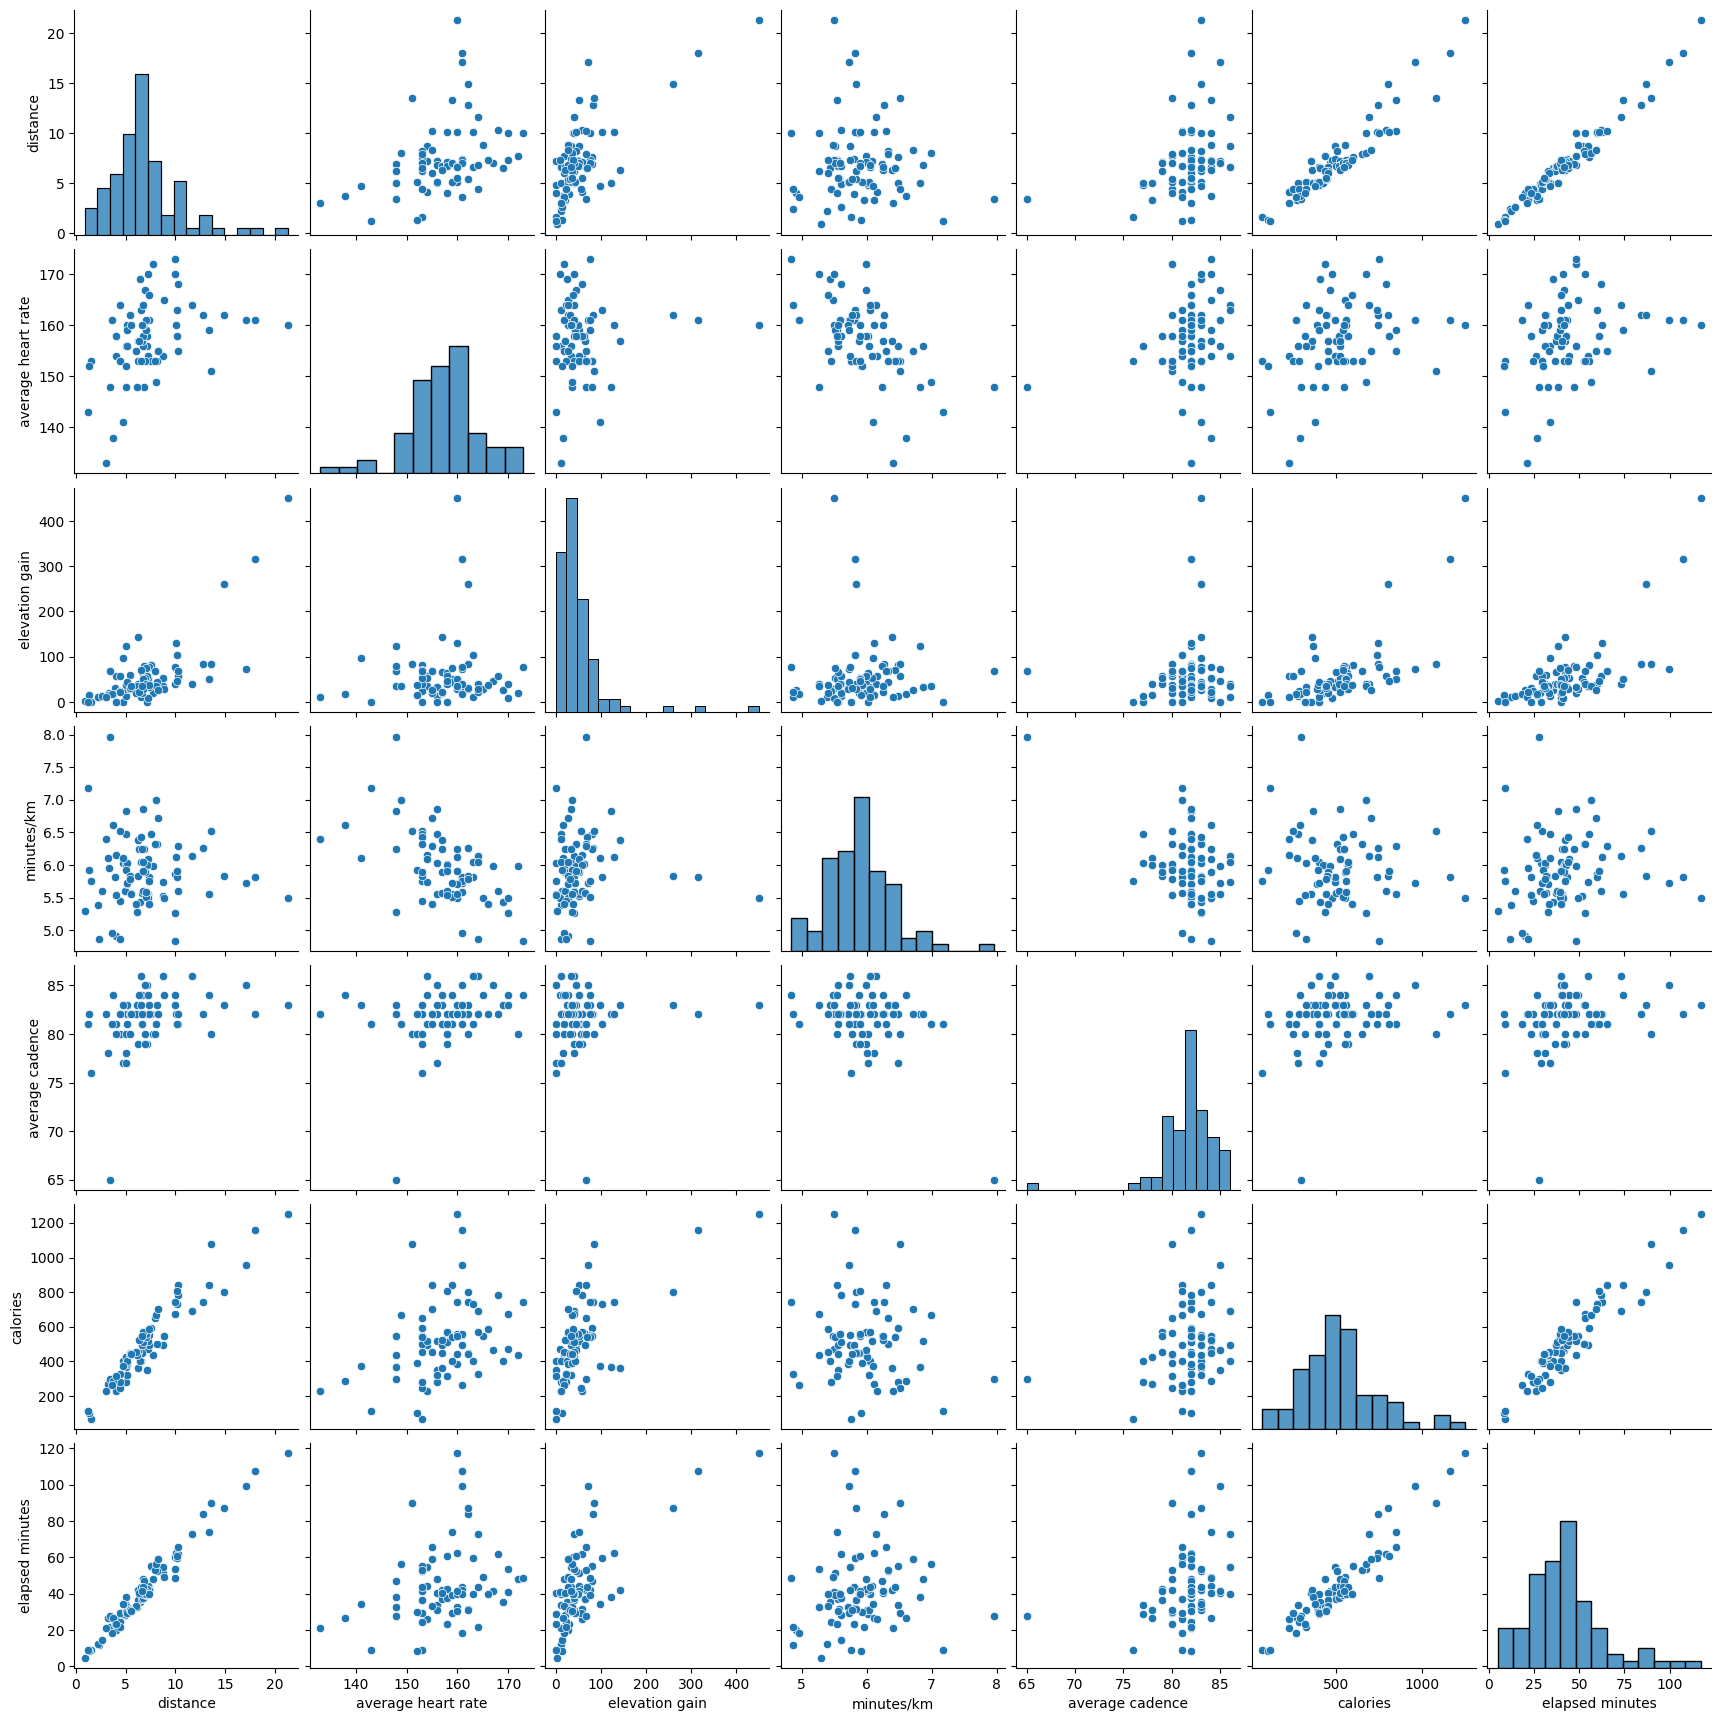

In [65]:
pairplot_columns = [ 'distance', 'average heart rate', 'elevation gain',  'minutes/km', 'average cadence','calories', 'elapsed minutes' ]
sns.pairplot(data[pairplot_columns])


In [66]:
data = data[data['minutes/km']<7.5]
data.describe().round(0)

,activity id,activity date,elapsed time,distance,max heart rate,average heart rate,elevation gain,elevation loss,max speed,average speed,max cadence,average cadence,calories,year,dayofyear,dayofweek,elapsed minutes,average_km/h,minutes/km
count,8.800000e+01,88,88.0,88.0,72.0,72.0,88.0,88.0,88.0,88.0,75.0,75.0,75.0,88.0,88.0,88.0,88.0,88.0,88.0
mean,1.442921e+10,2025-04-10 11:29:57.590908928,2513.0,7.0,179.0,157.0,52.0,72.0,5.0,3.0,89.0,82.0,518.0,2025.0,187.0,3.0,42.0,10.0,6.0
min,7.642634e+09,2022-08-15 15:09:27,290.0,1.0,147.0,133.0,0.0,0.0,3.0,2.0,80.0,76.0,70.0,2022.0,21.0,0.0,5.0,8.0,5.0
25%,1.400947e+10,2025-03-25 07:44:28,1798.0,5.0,174.0,153.0,22.0,27.0,4.0,3.0,87.0,81.0,390.0,2025.0,110.0,1.0,30.0,10.0,6.0
50%,1.464181e+10,2025-05-30 12:01:41,2388.0,7.0,180.0,158.0,38.0,44.0,4.0,3.0,88.0,82.0,496.0,2025.0,180.0,3.0,40.0,10.0,6.0
75%,1.553653e+10,2025-08-21 12:22:53.500000,2984.0,8.0,184.0,161.0,58.0,70.0,5.0,3.0,90.0,83.0,592.0,2025.0,270.0,5.0,50.0,11.0,6.0
max,1.667691e+10,2025-12-07 15:12:55,7038.0,21.0,197.0,173.0,451.0,866.0,10.0,3.0,113.0,86.0,1249.0,2025.0,341.0,6.0,117.0,12.0,7.0
std,1.925433e+09,NaN,1265.0,4.0,9.0,7.0,64.0,113.0,1.0,0.0,6.0,2.0,223.0,1.0,88.0,2.0,21.0,1.0,0.0


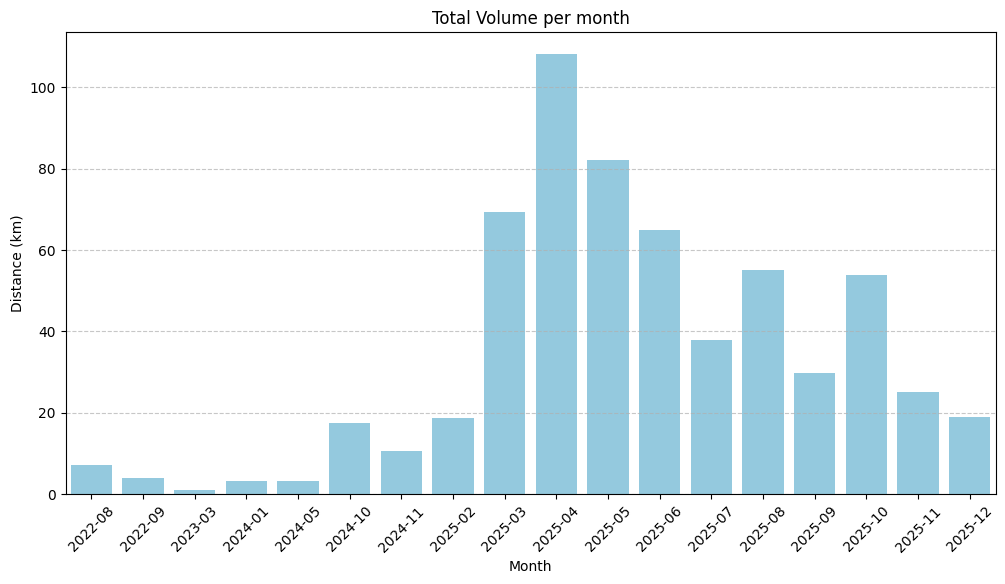

In [67]:
# lets see volume of each month

data['year_month'] = data['activity date'].dt.to_period('M')
monthly_volume = data.groupby('year_month')['distance'].sum().reset_index() #
# Convert to string for the x-axis
monthly_volume['year_month'] = monthly_volume['year_month'].astype(str)
# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='distance', data=monthly_volume, color='skyblue')
plt.title('Total Volume per month')
plt.xlabel('Month')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45) # Vinkla texten så den blir läsbar
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

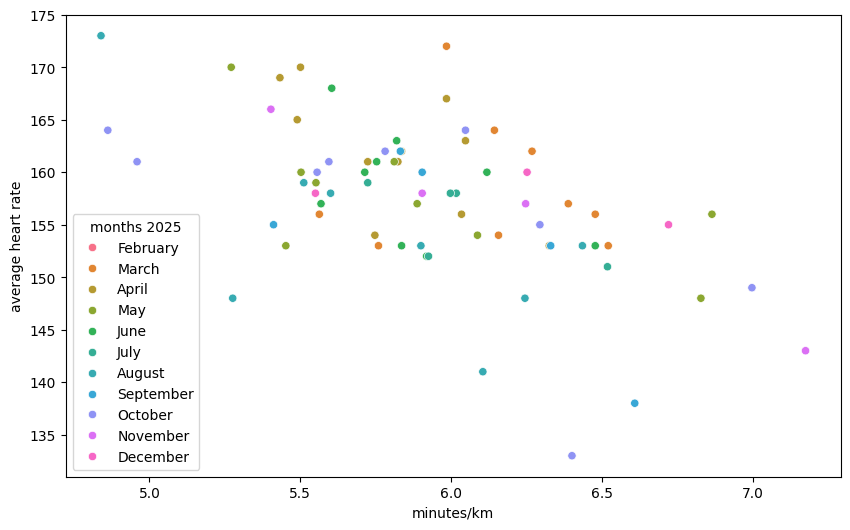

In [68]:
#has the heart rate become lower over time during 2025?
plt.figure(figsize=(10,6))
data['months 2025'] = data['month']
data['months 2025'] = data['months 2025'][data['year'] == 2025]
sns.scatterplot(data = data, x = 'minutes/km', y = 'average heart rate', hue = 'months 2025')
plt.show()
#average has accually lowered!

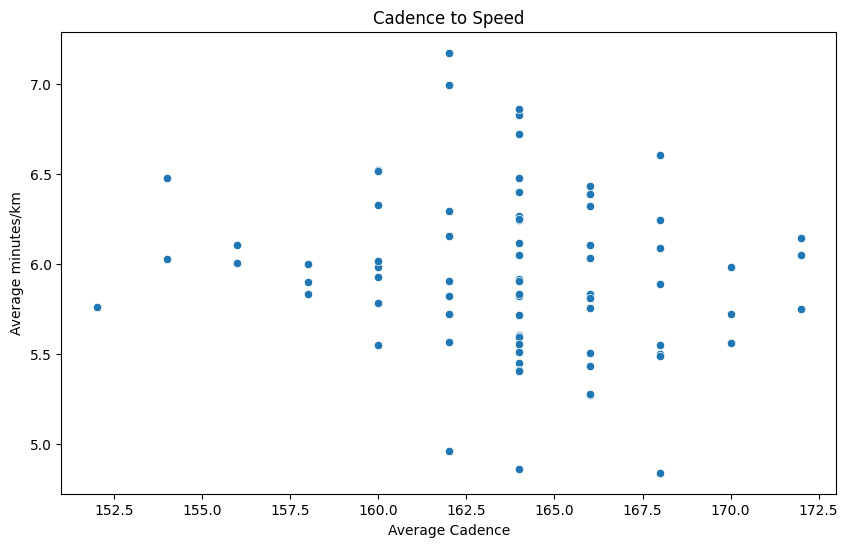

In [ ]:
#lets see the cadance-speed relationship
#fix the cadance to steps/minute
data['average cadence'] = data['average cadence'].fillna(0) #fill empty values with 0 
data['average cadence'] = data['average cadence'] * 2 #from rpm to steps/minute
data['max cadance'] = data['max cadence'].fillna(0) #fill empty values with 0
data['max cadance'] =  data['max cadence'] * 2 

plt.figure(figsize=(10,6))
cadance_data = data[data['average cadence'] > 0]
sns.scatterplot(x=cadance_data['average cadence'], y=cadance_data['minutes/km'])
plt.xlabel('Average Cadence')
plt.ylabel('Average minutes/km')
plt.title('Cadence to Speed')
plt.show()
#cant draw conclusions, seems i have to improve my technique.. 